The purpose of this notebook is to show how to use pySULI as a python package\
rather than importing necessary methods inside notebook cells.


# Imports

In [1]:
import sys
sys.path += ['..']

In [2]:
import pysuli



Checking required packages:

---pyFAI package with version 2024.5.0 is available and imported 
---xarray package with version 2024.7.0 is available and imported 
---ipympl package with version 0.9.4 is available and imported 
---scipy package with version 1.14.0 is available and imported 
---numpy package with version 1.26.4 is available and imported 
---pymatgen package with version 2024.7.18 is available and imported 
---pandas package with version 2.2.2 is available and imported 
---fabio package with version 2024.4.0 is available and imported 
---mp_api package with version 0.41.2 is available and imported 
GSAS-II binary directory: /home/mt/G2/GSAS-II/GSASII-bin/linux_64_p3.11_n1.26


Imported pysuli with following configuration:

- gsas2_scratch : /home/mt/.gsas2_scratch
- gsas2_lib : /home/mt/G2/GSAS-II/GSASII


In [3]:
from pysuli.generic_methods import *
from pysuli.gsas2_utils import *
from pysuli.plotting_utils import *

In [4]:
# Here we check if this notebook is running on Google Colab.
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [5]:
# If the notebbok is running on Google Colab, we mount google drive to instance
# and enable enable_custom_widget_manager for ipympl package to work properly.
# See See: https://matplotlib.org/ipympl/ for ipympl

if IN_COLAB:
    # mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    # Enable enable_custom_widget_manager
    from google.colab import output
    output.enable_custom_widget_manager()

In [6]:
# importing matplotlib for plots.
%matplotlib widget
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# Refinements

In [7]:
# Assuming notebook and data folder are here.

here = os.getcwd()
example_data_path = 'example_data/xrd_refinement_with_gsas2/'

os.chdir('%s/%s'%(here,example_data_path))
os.listdir()

['Background.nc',
 'Pt.gpx',
 'ZrH.gpx',
 'LaB6.gpx',
 'LaB6.nc',
 'ZrH.nc',
 'LaB6.cif',
 'Pt.cif',
 'Zr.cif',
 'gsas.instprm',
 'Pt.nc',
 'Ceo2.cif',
 'gsas2_scratch',
 'Zr-H1.66.cif']

In [8]:
with xr.open_dataset('Background.nc') as ds:
    da_input_bkg = ds.i2d.mean(dim='azimuthal')

/home/mt/.gsas2_scratch/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas.instprm (G2 fmt) bank None
/home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/LaB6.cif read by Reader CIF
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
['LaB6\n(a = 4.15637)']


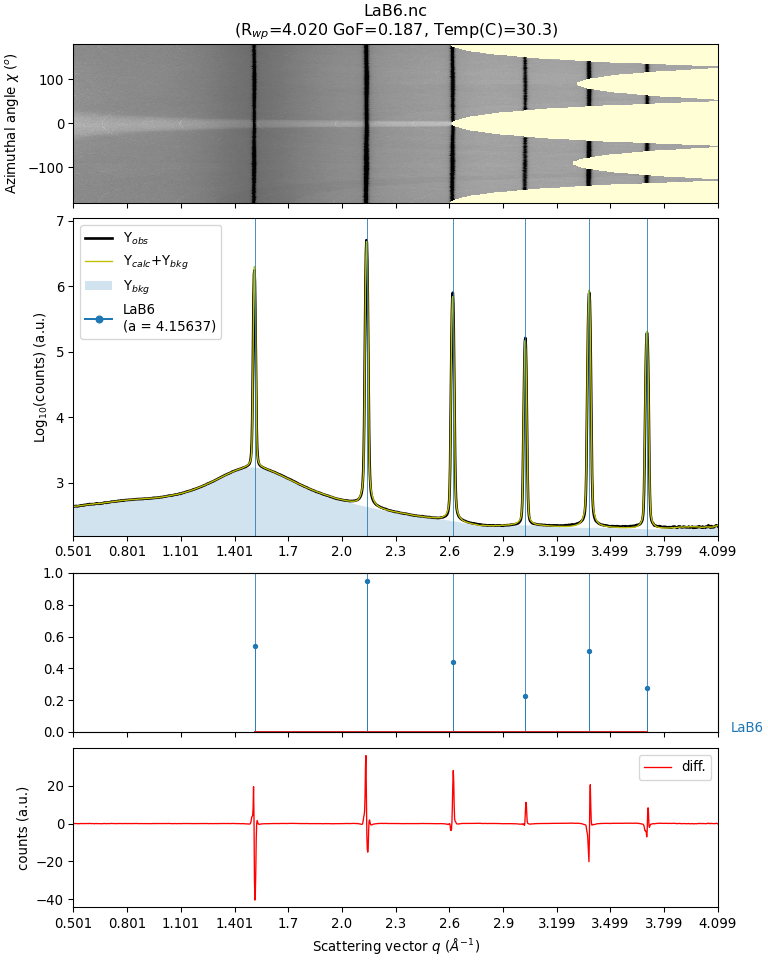

In [9]:
#Creating the refiner

LaB6_refiner = Refiner(
    nc_path = 'LaB6.nc',
    phases = [{'cif_abs_path':'LaB6.cif','phase_name':'LaB6','scale':1},],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas.instprm',
    q_range = None,
    da_input_bkg = da_input_bkg 
#NOTE: Refiner can create its own background if set to None. Try both to see changes in GoF and Rwp
)


LaB6_refiner.refine_background(10)
LaB6_refiner.refine_cell_params()
LaB6_refiner.refine_strain_broadening()
LaB6_refiner.refine_size_broadening()
LaB6_refiner.refine_background(20)
LaB6_refiner.refine_inst_parameters()
LaB6_refiner.save_refinement()
LaB6_refiner.plot_refinement_results()

/home/mt/.gsas2_scratch/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas.instprm (G2 fmt) bank None
/home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Pt.cif read by Reader CIF
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
['PteO2\n(a = 3.92047)']


/home/mt/software/miniforge3/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


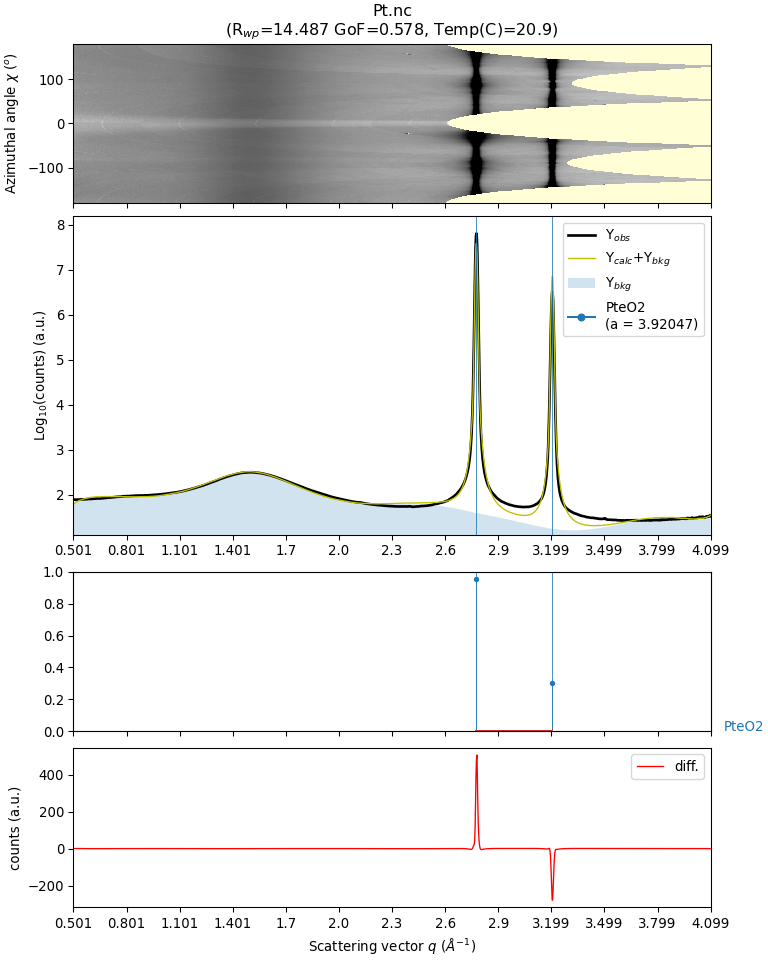

In [10]:
Pt_refiner = Refiner(
    nc_path = 'Pt.nc',
    phases = [{'cif_abs_path':'Pt.cif','phase_name':'PteO2','scale':1},],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas.instprm',
    q_range = None,
    da_input_bkg = da_input_bkg 
)

Pt_refiner.refine_background(5)
Pt_refiner.refine_cell_params()
Pt_refiner.refine_size_broadening()
Pt_refiner.refine_strain_broadening()
Pt_refiner.refine_background(10)
Pt_refiner.save_refinement()
Pt_refiner.plot_refinement_results()

/home/mt/.gsas2_scratch/data.xy read by Reader comma/tab/semicolon separated
Instrument parameters read: /home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/gsas.instprm (G2 fmt) bank None
/home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Pt.cif read by Reader CIF
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
/home/mt/temp/pySULI/notebooks/example_data/xrd_refinement_with_gsas2/Zr.cif read by Reader CIF
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
gpx file saved as /home/mt/.gsas2_scratch/gsas.gpx
['Pt\n(a = 3.922042)', 'Zr\n(a = 3.22743

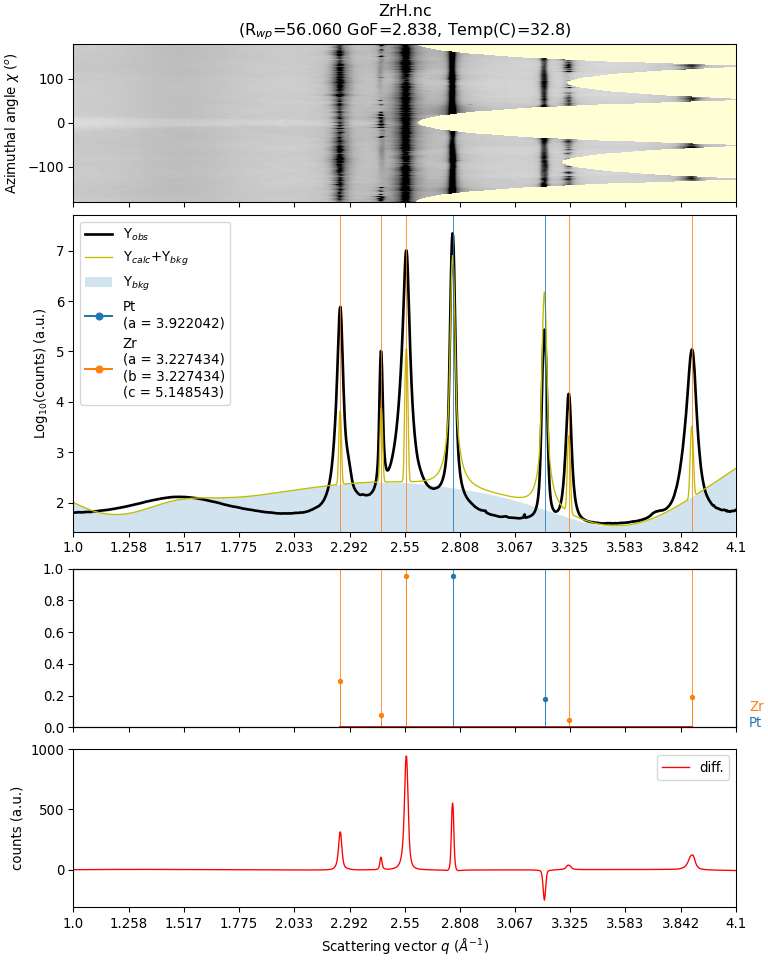

In [11]:
ZrH_refiner = Refiner(
    nc_path = 'ZrH.nc',
    phases = [
    {'cif_abs_path':'Pt.cif','phase_name':'Pt','scale':1},
    {'cif_abs_path':'Zr.cif','phase_name':'Zr','scale':1},
    ],
    gsas2_scratch = pysuli_defaults['gsas2_scratch'],
    instrument_parameters_file = 'gsas.instprm',
    q_range=[1,4.1],
    da_input_bkg = da_input_bkg 
)

ZrH_refiner.refine_background(3)
ZrH_refiner.refine_cell_params()
ZrH_refiner.refine_size_broadening()
ZrH_refiner.refine_strain_broadening()
ZrH_refiner.refine_background(5)
ZrH_refiner.refine_size_broadening()
ZrH_refiner.refine_strain_broadening()
ZrH_refiner.save_refinement()
ZrH_refiner.plot_refinement_results()